In [1]:
import pandas as pd
import numpy as np
import networkx as nx

df = pd.read_csv('./Data/pp_dep_2017_2019.csv', delimiter=';')
df

,HS6_i,HS6_j,f_ij,f_i,f_j,f,odds,pr_norm,link01,short_name_ENG_i,short_name_ENG_j
0,107111,106121,901,15723,3395,1189028,20.069737,0.905077,1,Fresh bread containing by,Wheat or meslin flour
1,107111,106140,769,15723,3072,1189028,18.930487,0.899651,1,Fresh bread containing by,"Bran, sharps and other re"
2,107112,106121,762,14496,3395,1189028,18.410225,0.896962,1,Cake and pastry products;,Wheat or meslin flour
3,251123,256220,665,13160,20715,1189028,2.900500,0.487245,1,Iron or steel equipment f,Metal parts (excluding tu
4,256210,256220,646,10228,20715,1189028,3.625342,0.567600,1,Turned metal parts for ta,Metal parts (excluding tu
...,...,...,...,...,...,...,...,...,...,...,...
243975,259316,275111,1,1486,547,1189028,1.462803,0.187917,1,Iron or steel hot-worked,Combined refrigerators-fr
243976,259313,275111,1,882,547,1189028,2.464542,0.422723,1,Endless bands for machine,Combined refrigerators-fr
243977,201462,181110,1,1976,473,1189028,1.272167,0.119783,1,Acetone,"Printed newspapers, journ"
243978,201464,181110,1,696,473,1189028,3.611783,0.566328,1,"Other organic compounds,","Printed newspapers, journ"


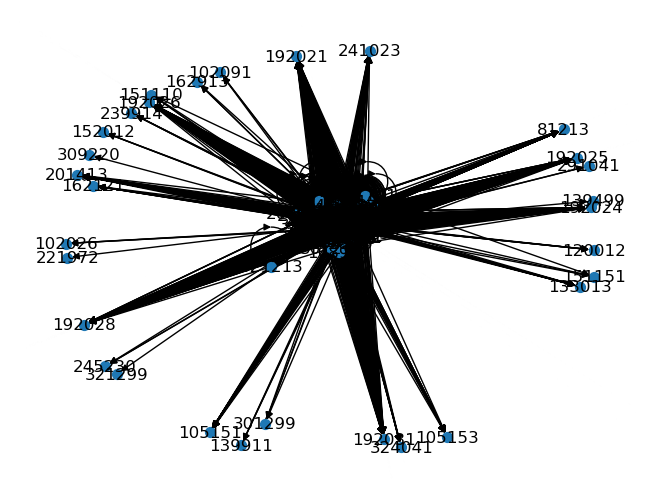

In [2]:
G = nx.DiGraph()

# Add the nodes

unique_product_codes = set(df['HS6_i']).union(set(df['HS6_j']))

G.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df.iterrows():
    product_i = row['HS6_i']
    product_j = row['HS6_j']
    weight = row['f_ij']
    G.add_edge(product_i, product_j, weight=weight)

nx.draw(G,node_size=50,with_labels=True)


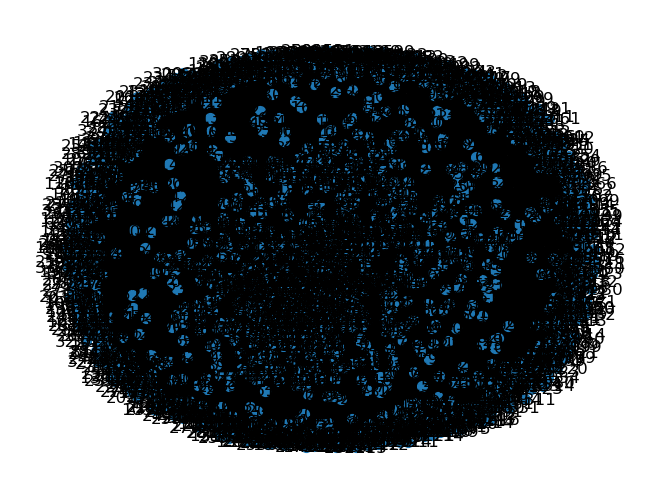

In [18]:
# Calculate the total value of weights
total_weight = sum([d['weight'] for u, v, d in G.edges(data=True)])

# Normalize weights using the total value
for u, v, d in G.edges(data=True):
    d['weight'] /= total_weight

nx.draw(G,node_size=50,with_labels=True)


In [19]:
As = nx.adjacency_matrix(G)
A =As.todense()
print(A)


[[0.00000000e+00 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  1.69652552e-05 1.69652552e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.69652552e-05 0.00000000e+00 0.00000000e+00 ... 1.69652552e-05
  1.69652552e-05 1.69652552e-05]
 ...
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 0.00000000e+00
  1.69652552e-05 1.69652552e-05]
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  0.00000000e+00 1.69652552e-05]
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  1.69652552e-05 0.00000000e+00]]
